In [1]:
#Data analysis
import pandas as pd
import numpy as np

#Visualisations and plots
import seaborn as sns
sns.set(style="white", context="talk")
import matplotlib.pyplot as plt
%matplotlib inline

### Acquiring Data 

In [2]:
#training data
train_db=pd.read_csv('mushroom_train.csv')
#test data
test_db=pd.read_csv('mushroom_test.csv')
#combine data
combine = [train_db, test_db]

In [3]:
print len(train_db.columns.values)
print list(train_db.columns.values)

25
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'radius', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'weight', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [4]:
train_db.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


The data set contains only two continious variables the rest of the freatures are categorical

In [5]:
train_db.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [6]:
train_db.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
5681,p,f,y,e,f,f,f,c,n,b,...,p,p,p,w,23,o,e,w,v,p
5682,e,k,s,e,t,n,f,c,b,e,...,w,w,p,w,23,t,e,w,c,w
5683,p,x,f,g,f,c,f,c,n,u,...,w,w,p,w,23,o,p,k,v,d
5684,p,f,s,n,f,s,f,c,n,b,...,w,w,p,w,50,o,e,w,v,p
5685,e,b,s,w,t,a,f,c,b,w,...,w,w,p,w,23,o,p,n,s,m


In [7]:
print train_db.info()
print '.'*80
print test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 25 columns):
class                       5686 non-null object
cap-shape                   5686 non-null object
cap-surface                 5686 non-null object
cap-color                   5686 non-null object
bruises                     5686 non-null object
odor                        5686 non-null object
gill-attachment             5686 non-null object
gill-spacing                5686 non-null object
gill-size                   5686 non-null object
gill-color                  5686 non-null object
stalk-shape                 5686 non-null object
stalk-root                  5686 non-null object
radius                      5686 non-null int64
stalk-surface-above-ring    5686 non-null object
stalk-surface-below-ring    5686 non-null object
stalk-color-above-ring      5686 non-null object
stalk-color-below-ring      5686 non-null object
veil-type                   5686 non-null object
veil-color  

Information we get 
    1. There ae 5686 and 2438 colums in train and test data set respectively 
    2. We have to use the 24 columns in our given train data set for further ananlysis
    3. The train data set contains no null values ('?'- given as null value in problem statement but the python  command reading '?' as in a string format)
    4. Values of radius and weight is of integer type

Making a seperate list of categorical vaiables 

In [8]:
categorical_variables = train_db.dtypes[train_db.dtypes=='object'].index.values

Number of different catregorical entries in each column

In [9]:
train_db[categorical_variables].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Here from the above results we see that there is only one type of categorical variable in the column viel-type. So it has high correlation with the other variables in the train data set and also due to same varible in a column the variable is not going to affect our results. So it is clear that we should drop that column from the training and test data set

In [10]:
train_db = train_db.drop('veil-type', axis=1)
test_db = test_db.drop('veil-type', axis=1)

In [11]:
categorical_variables = train_db.dtypes[train_db.dtypes=='object'].index.values
train_db[categorical_variables].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [12]:
print "number of missing values of stalk-root in train data set is : %d" %len(train_db[train_db['stalk-root']=='?'])
print "number of missing values of stalk-root in test data set is : %d" %len(test_db[test_db['stalk-root']=='?'])

number of missing values of stalk-root in train data set is : 1727
number of missing values of stalk-root in test data set is : 753


In [13]:
#its good and safe to make a copy of our original data 
train_db_orignal = train_db.copy()
test_db_orignal = test_db.copy()

    There are total 1727 missing values(?) in stalk-root column in the given data set which is quite significant 
    Here the data set contains a missing variable in the column stalk-root but it in the form of string due to which python is not identifying that as NaN
    if we do label encoding without considering '?' as a missing value then python treat that as a new variable and do label encoding for that by considering it as a variable 

    Here we can go with two approaches as  
        1. considering ? as a variable field of stalk-root 
    
        2. Replacing the ? with some other variables 

    First I am following the 1 method mentioned above and checking accuracy for different models 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

    Encoding the categorical varibles with a numeric number, same number for same object so that it simplifies   our analysis

In [15]:
for variables in categorical_variables:
    train_db[variables]=le.fit_transform(train_db[variables])
    if variables!='class':
        test_db[variables]=le.fit_transform(test_db[variables])

In [16]:
train_db.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,...,1,6,7,2,38,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,...,2,7,7,2,43,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,...,2,2,2,2,37,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,...,2,6,7,2,82,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,...,2,7,7,2,36,1,4,3,3,3


    Categorical features in our train data set are encoded with an integer 
    let's check the mapping 

In [17]:
count_class = train_db['class']
print  "count of p class: %d" %sum(count_class)
print "count of e class: %d" %(len(count_class)-sum(count_class))

count of p class: 2741
count of e class: 2945


    Here the two values of outputs(i.e. to be predicted) in train data set are nearly 50-50% i.e both are equally distributed

Correlation between the features

In [18]:
train_db.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.042155,0.176899,-0.018315,-0.502157,-0.091765,0.119715,-0.348396,0.539296,-0.531714,...,-0.303188,-0.141789,-0.140983,0.139915,0.007413,-0.217923,-0.413472,0.164303,0.292035,0.216358
cap-shape,0.042155,1.000000,-0.050507,-0.049525,-0.028575,-0.021651,0.073417,-0.001366,0.046013,-0.006245,...,-0.031333,-0.035038,-0.029181,0.064026,0.015889,-0.123694,-0.026889,-0.084278,0.070923,-0.042490
cap-surface,0.176899,-0.050507,1.000000,-0.023641,0.066776,0.051636,-0.033450,-0.274616,0.207781,-0.167356,...,0.099681,0.070571,0.063991,-0.013444,-0.010072,-0.023283,-0.113144,0.231465,0.012944,0.158039
cap-color,-0.018315,-0.049525,-0.023641,1.000000,-0.011004,-0.384536,0.041425,0.149580,-0.164310,0.079571,...,-0.061882,-0.000779,-0.004182,0.037910,0.003412,0.000711,0.153141,-0.284759,-0.153048,0.038552
bruises,-0.502157,-0.028575,0.066776,-0.011004,1.000000,-0.055836,0.132196,-0.299498,-0.365449,0.526684,...,0.459844,0.071998,0.088409,0.113148,-0.012115,0.049784,0.693615,-0.284631,0.082524,-0.078090
odor,-0.091765,-0.021651,0.051636,-0.384536,-0.055836,1.000000,-0.054703,0.065724,0.319945,-0.128353,...,0.074021,0.175100,0.178315,-0.052985,0.010299,0.112166,-0.277452,0.473380,-0.047982,-0.033562
gill-attachment,0.119715,0.073417,-0.033450,0.041425,0.132196,-0.054703,1.000000,0.068124,0.103890,-0.124812,...,-0.112935,0.097695,0.093831,0.894226,0.016178,0.095721,-0.138358,-0.029423,0.169458,-0.027452
gill-spacing,-0.348396,-0.001366,-0.274616,0.149580,-0.299498,0.065724,0.068124,1.000000,-0.105925,0.103402,...,-0.205091,0.276282,0.253343,0.074113,0.002415,0.251853,-0.189465,0.060826,-0.527422,-0.149350
gill-size,0.539296,0.046013,0.207781,-0.164310,-0.365449,0.319945,0.103890,-0.105925,1.000000,-0.515428,...,0.013449,0.300321,0.284636,0.101500,0.017982,-0.175917,-0.460385,0.619809,0.136891,0.160517
gill-color,-0.531714,-0.006245,-0.167356,0.079571,0.526684,-0.128353,-0.124812,0.103402,-0.515428,1.000000,...,0.261116,-0.064780,-0.080552,-0.092610,-0.008161,0.097492,0.624766,-0.408625,-0.033504,-0.206406


#### HeatMap of cprrelation 

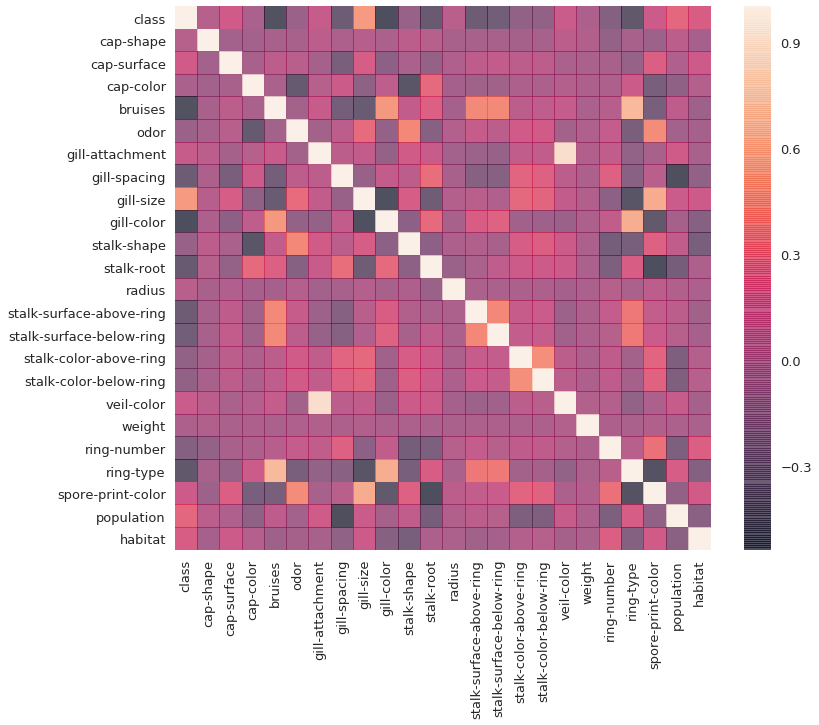

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(train_db.corr(), alpha=0.7)
plt.show()

    here the correlation between the viel-color and gill-attachment is very high i.e between 0.8-0.9.
    Correlated features do not affect classification accuracy per se. The problem in realistic situations is that we have a finite number of training examples with which to train a classifier. For a fixed number of training examples, increasing the number of features typically increases classification accuracy to a point but as the number of features continue to increase, classification accuracy will eventually decrease because we are then undersampled relative to the large number of features. here the features are not so much that we should apply dimensionality reduction using PCA or MDS

In [20]:
train_db[['veil-color', 'gill-attachment']].corr()

,veil-color,gill-attachment
veil-color,1.000000,0.894226
gill-attachment,0.894226,1.000000


    Tabulating and plotting the percentage of poisonous of each type of cap-shape  i.e. average of each variable in each feature beacuse 1 is encoded as poisonous

,cap-shape,class
0,0,0.108974
1,1,1.000000
2,2,0.497935
3,3,0.727119
4,4,0.000000
5,5,0.461210


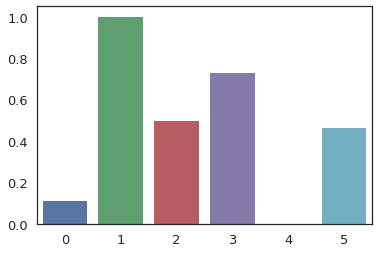

In [21]:
arr=train_db['cap-shape'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['cap-shape']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['cap-shape', 'class']].groupby(['cap-shape'], as_index=False).mean()

    All the mushrooms of cap=shape of type are non-poisonous i.e all edible

,cap-surface,class
0,0,0.328818
1,1,1.000000
2,2,0.551900
3,3,0.535948


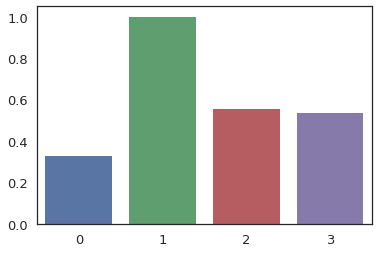

In [22]:
arr=train_db['cap-surface'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['cap-surface']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['cap-surface', 'class']].groupby(['cap-surface'], as_index=False).mean()

,cap-color,class
0,0,0.705357
1,1,0.250000
2,2,0.568571
3,3,0.436533
4,4,0.455000
5,5,0.596154
6,6,0.000000
7,7,0.000000
8,8,0.309722
9,9,0.634921


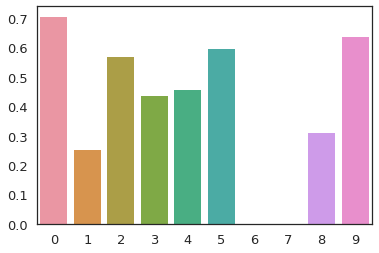

In [23]:
arr=train_db['cap-color'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['cap-color']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['cap-color', 'class']].groupby(['cap-color'], as_index=False).mean()

    All the mushrooms of cap-color of type 6 & 7 are non-poisonous 

,bruises,class
0,0,0.695573
1,1,0.187186


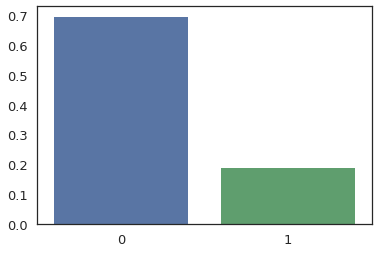

In [24]:
arr=train_db['bruises'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['bruises']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['bruises', 'class']].groupby(['bruises'], as_index=False).mean()

,odor,class
0,0,0.000000
1,1,1.000000
2,2,1.000000
3,3,0.000000
4,4,1.000000
5,5,0.036992
6,6,1.000000
7,7,1.000000
8,8,1.000000


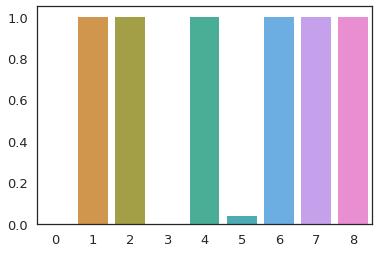

In [25]:
arr=train_db['odor'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['odor']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['odor', 'class']].groupby(['odor'], as_index=False).mean()

    All the mushrooms of odour of type 0&3 are all edible and the musroom of odor type 5 contains a small fraction of poisonous mushrooms

,gill-attachment,class
0,0,0.097015
1,1,0.491354


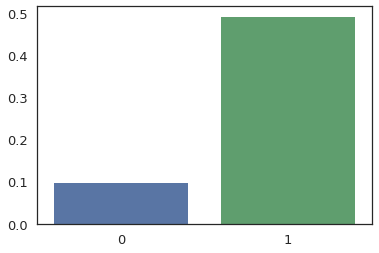

In [26]:
arr=train_db['gill-attachment'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['gill-attachment']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['gill-attachment', 'class']].groupby(['gill-attachment'], as_index=False).mean()

,gill-spacing,class
0,0,0.558398
1,1,0.085060


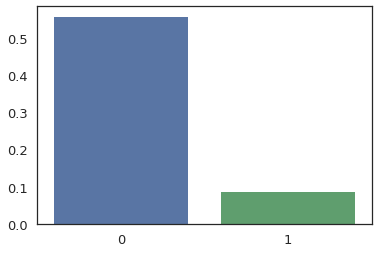

In [27]:
arr=train_db['gill-spacing'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['gill-spacing']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['gill-spacing', 'class']].groupby(['gill-spacing'], as_index=False).mean()

,gill-size,class
0,0,0.301858
1,1,0.885031


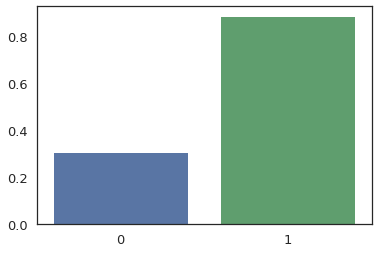

In [28]:
arr=train_db['gill-size'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['gill-size']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['gill-size', 'class']].groupby(['gill-size'], as_index=False).mean()

,gill-color,class
0,0,1.000000
1,1,0.000000
2,2,0.653992
3,3,0.718868
4,4,0.185874
5,5,0.114011
6,6,0.000000
7,7,0.427767
8,8,1.000000
9,9,0.085044


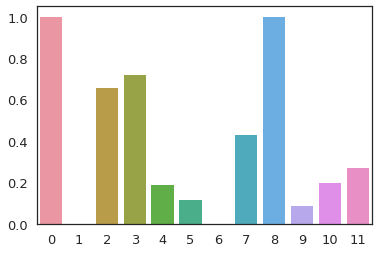

In [29]:
arr=train_db['gill-color'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['gill-color']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['gill-color', 'class']].groupby(['gill-color'], as_index=False).mean()

,stalk-shape,class
0,0,0.545085
1,1,0.433933


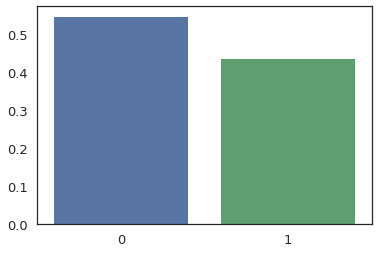

In [30]:
arr=train_db['stalk-shape'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-shape']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-shape', 'class']].groupby(['stalk-shape'], as_index=False).mean()

,stalk-root,class
0,0,0.708743
1,1,0.486679
2,2,0.083770
3,3,0.241026
4,4,0.000000


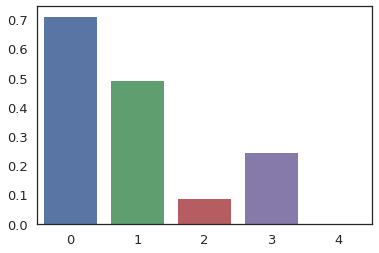

In [31]:
arr=train_db['stalk-root'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-root']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-root', 'class']].groupby(['stalk-root'], as_index=False).mean()

,stalk-surface-above-ring,class
0,0,0.268421
1,1,0.939193
2,2,0.295530
3,3,0.380952


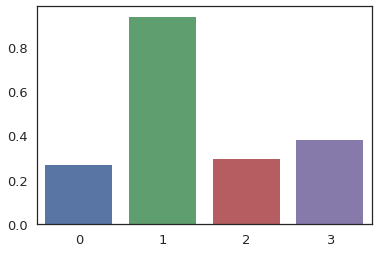

In [32]:
arr=train_db['stalk-surface-above-ring'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-surface-above-ring']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-surface-above-ring', 'class']].groupby(['stalk-surface-above-ring'], as_index=False).mean()

,stalk-surface-below-ring,class
0,0,0.245098
1,1,0.935564
2,2,0.310424
3,3,0.278607


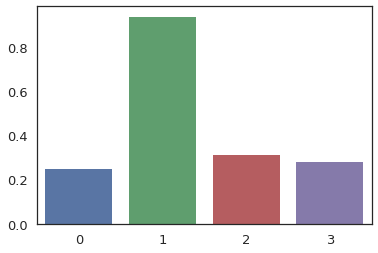

In [33]:
arr=train_db['stalk-surface-below-ring'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-surface-below-ring']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-surface-below-ring', 'class']].groupby(['stalk-surface-below-ring'], as_index=False).mean()

,stalk-color-above-ring,class
0,0,1.000000
1,1,1.000000
2,2,0.000000
3,3,0.000000
4,4,0.958730
5,5,0.000000
6,6,0.700539
7,7,0.384369
8,8,1.000000


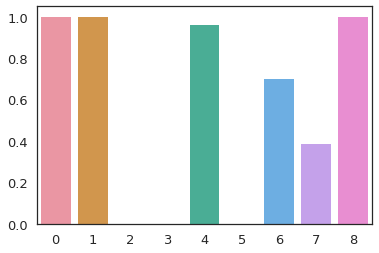

In [34]:
arr=train_db['stalk-color-above-ring'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-color-above-ring']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-color-above-ring', 'class']].groupby(['stalk-color-above-ring'], as_index=False).mean()

,stalk-color-below-ring,class
0,0,1.000000
1,1,1.000000
2,2,0.000000
3,3,0.000000
4,4,0.864789
5,5,0.000000
6,6,0.690810
7,7,0.386667
8,8,1.000000


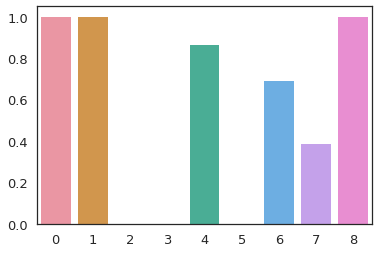

In [35]:
arr=train_db['stalk-color-below-ring'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['stalk-color-below-ring']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['stalk-color-below-ring', 'class']].groupby(['stalk-color-below-ring'], as_index=False).mean()

    Here we see that the graph of stalk-color-above-ring and stalk-color-below-ring are quite similar and that of stlk-surface above the ring and stalk-surface-below the ring 
    

,veil-color,class
0,0,0.000000
1,1,0.000000
2,2,0.491812
3,3,1.000000


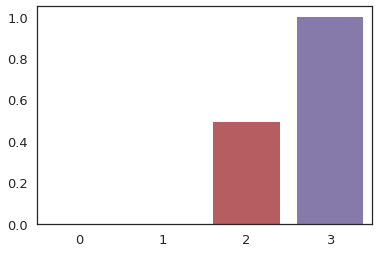

In [36]:
arr=train_db['veil-color'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['veil-color']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['veil-color', 'class']].groupby(['veil-color'], as_index=False).mean()

,ring-number,class
0,0,1.000000
1,1,0.509853
2,2,0.119540


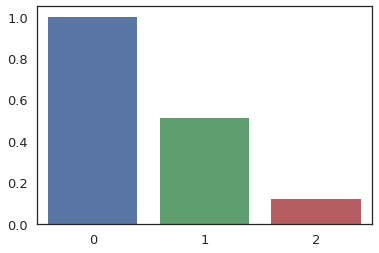

In [37]:
arr=train_db['ring-number'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['ring-number']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['ring-number', 'class']].groupby(['ring-number'], as_index=False).mean()

,ring-type,class
0,0,0.638011
1,1,0.000000
2,2,1.000000
3,3,1.000000
4,4,0.205882


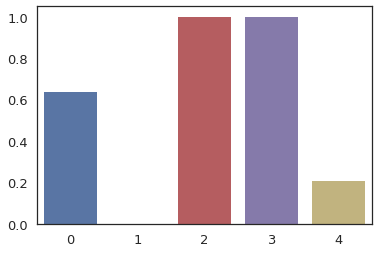

In [38]:
arr=train_db['ring-type'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['ring-type']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['ring-type', 'class']].groupby(['ring-type'], as_index=False).mean()

,spore-print-color,class
0,0,0.000000
1,1,0.971979
2,2,0.124611
3,3,0.110635
4,4,0.000000
5,5,1.000000
6,6,0.000000
7,7,0.751486
8,8,0.000000


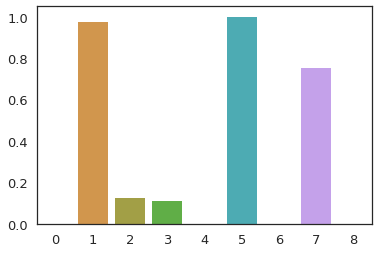

In [39]:
arr=train_db['spore-print-color'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['spore-print-color']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['spore-print-color', 'class']].groupby(['spore-print-color'], as_index=False).mean()

,population,class
0,0,0.000000
1,1,0.165289
2,2,0.000000
3,3,0.297605
4,4,0.701137
5,5,0.383101


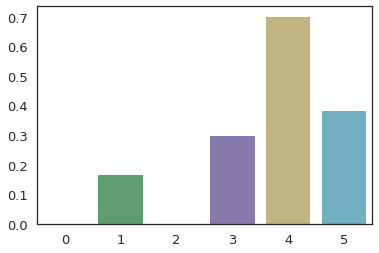

In [40]:
arr=train_db['population'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['population']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['population', 'class']].groupby(['population'], as_index=False).mean()

,habitat,class
0,0,0.399192
1,1,0.350000
2,2,0.725352
3,3,0.116162
4,4,0.880952
5,5,0.738281
6,6,0.000000


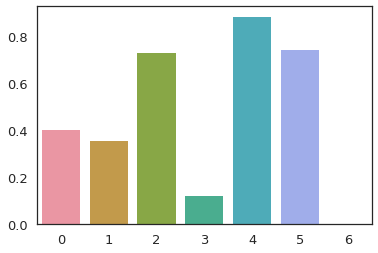

In [41]:
arr=train_db['habitat'].unique()
x = []
arr.sort()
for var in arr:
    z = train_db[train_db['habitat']==var]
    y = z['class'].mean()
    x.append(y)

plot = sns.barplot(arr, x)
train_db[['habitat', 'class']].groupby(['habitat'], as_index=False).mean()

    Drawing boxplots for various features

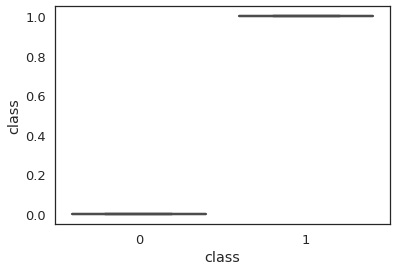

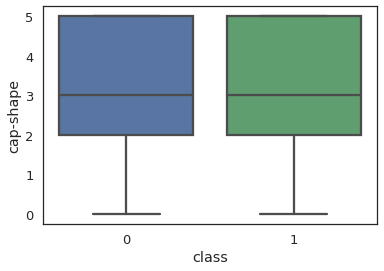

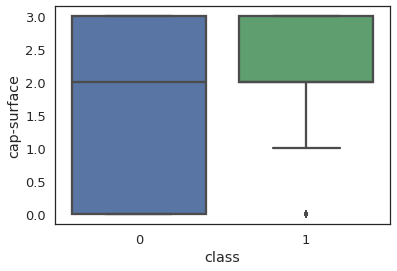

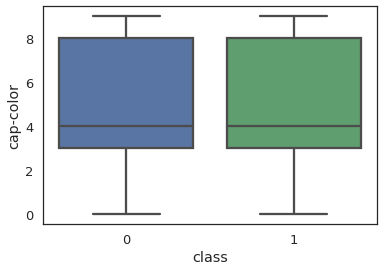

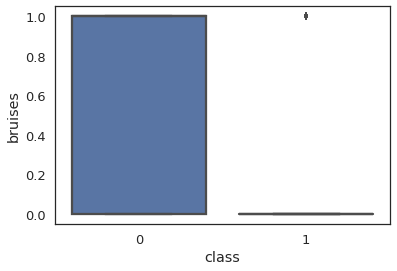

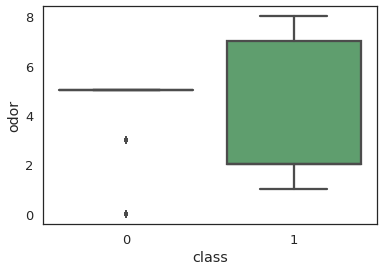

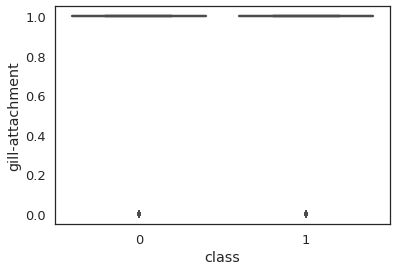

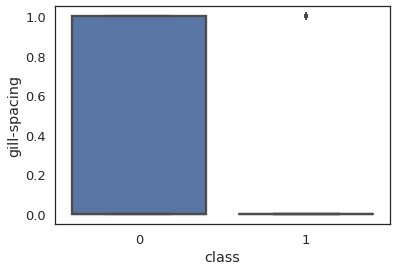

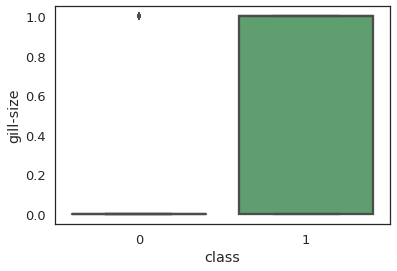

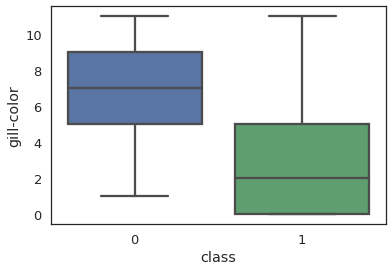

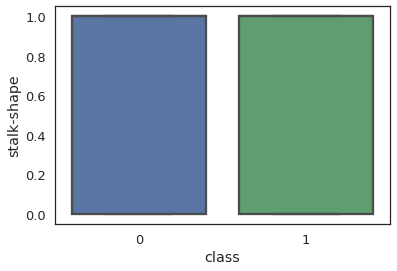

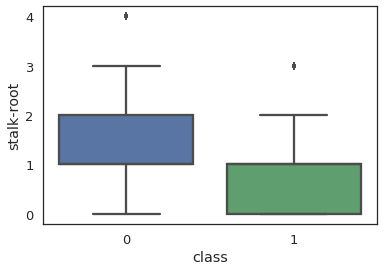

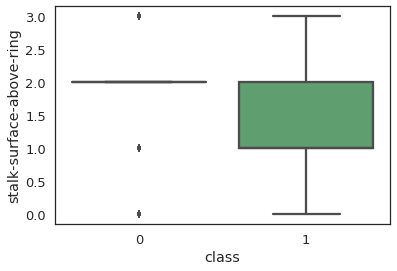

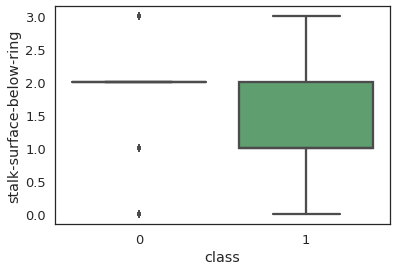

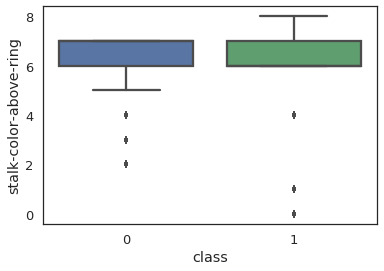

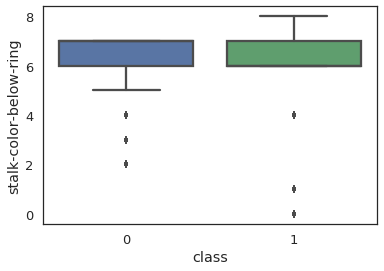

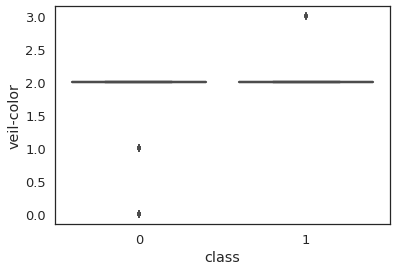

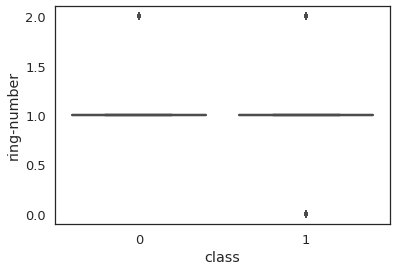

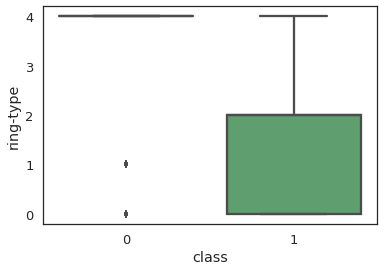

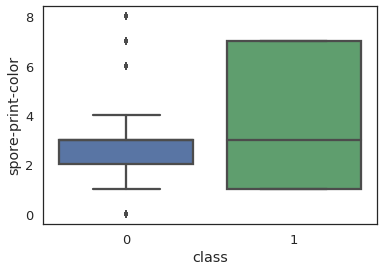

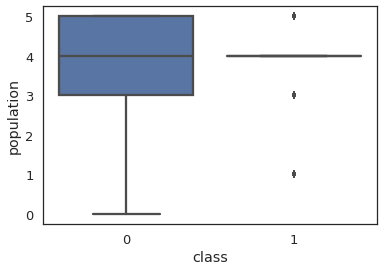

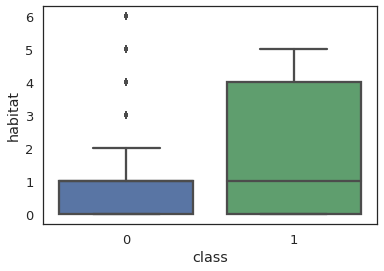

In [42]:
for catvar in categorical_variables:
    #plt.figure(figsize=(4,4))
    sns.boxplot(train_db['class'], train_db[catvar])
    plt.show()

    Graph of variation of radius in class 0 and 1 i.e. Poisonous and Edible respectively

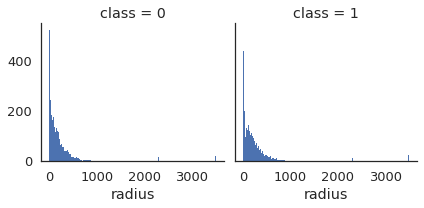

In [43]:
g = sns.FacetGrid(train_db, col='class')
g.map(plt.hist, 'radius', bins=200)

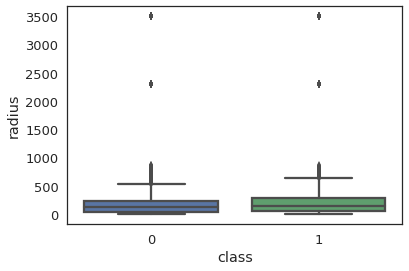

In [44]:
sns.boxplot(train_db['class'],train_db['radius'])

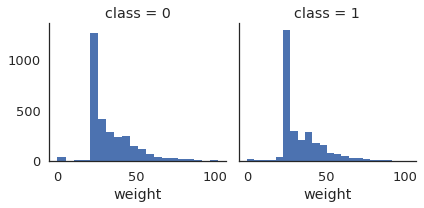

In [45]:
g = sns.FacetGrid(train_db, col='class')
g.map(plt.hist, 'weight', bins=20)

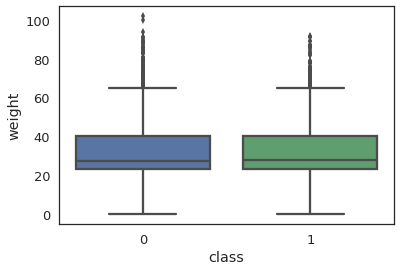

In [46]:
sns.boxplot(train_db['class'], train_db['weight'])

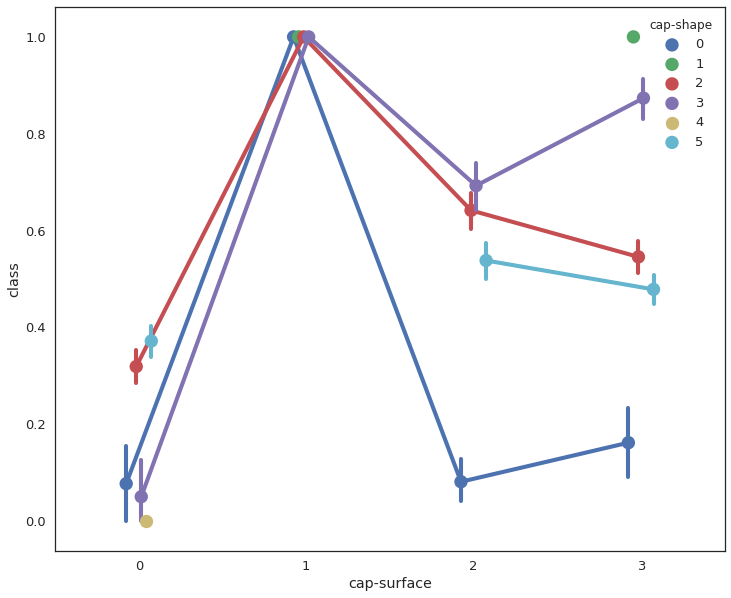

In [47]:
plt.figure(figsize=(12,10))
sns.pointplot(x="cap-surface", y="class", hue="cap-shape", data=train_db ,dodge=True,)

In [48]:
X = train_db.drop('class', axis=1)
Y = train_db['class']

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import  roc_curve, auc, roc_auc_score
from sklearn.metrics import  confusion_matrix, r2_score

/home/goyal/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


    Splitting the train data in two parts for train and test 

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.33)

###  KNN classifier 

##### cross validation on KNN classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier
my_list = range(1,50)
neighbors = filter(lambda x: x%2 != 0 , my_list)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k )
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [52]:
neighbor = np.argmax(cv_scores)*2+1
print "so maximum accuracy is when the value of k is in KNN classifier in: %d " %neighbor

so maximum accuracy is when the value of k is in KNN classifier in: 1 


In [53]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
knn_accuracy = accuracy_score(knn_predict, y_test)
print knn_accuracy

0.835375599361


In [54]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
print confusion_matrix(y_test, knn_predict)

[[862 119]
 [190 706]]


[[862 119]
 [190 706]]


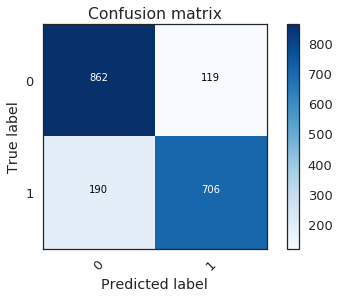

In [56]:
cnf_matrix = confusion_matrix(y_test, knn_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'] , title='Confusion matrix')
plt.show()

#### Area Under ROC Curve


In [57]:
FPR, TPR, Threshold = roc_curve(y_test, knn_predict)
area_under_roc = auc(FPR, TPR)
print "Area under ROC Curve(AUROC) is %s: " % area_under_roc

Area under ROC Curve(AUROC) is 0.833320818771: 


    From KNN classifier we get accuracy of 0.840703249867 which is not good enough so apply another model Logistic regression in hope to increase the model accuracy

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_model = logistic_reg.fit(x_train,y_train)
logistic_predict = logistic_model.predict(x_test)
logistic_accuracy= accuracy_score(logistic_predict, y_test)
print logistic_accuracy

0.948321790091


    Yipee the accuracy is much better than the accuracy of KNN classifier i.e. around 15% more 
    one of the reason behind it is that there are too much features in the data set so because of that KNN model does not perform well on this model 
    but we should always try other model to check their performance on the dataset 

In [59]:
print logistic_model.coef_

[[ -8.86e-02   4.97e-01  -3.17e-02  -5.83e-01  -3.68e-01  -1.40e+00
   -5.13e+00   6.60e+00  -1.00e-01  -6.49e-01  -1.80e+00   3.45e-04
   -3.63e+00  -3.54e-01  -9.04e-02  -3.57e-02   5.76e+00  -2.27e-03
    3.03e-01   5.48e-01  -3.34e-01  -2.70e-01   3.55e-02]]


In [60]:
print confusion_matrix(y_test, logistic_predict)
print "R-Square for logistic regression is %s" %r2_score(y_test, logistic_predict) 

[[942  39]
 [ 58 838]]
R-Square for logistic regression is 0.79286237622


[[942  39]
 [ 58 838]]


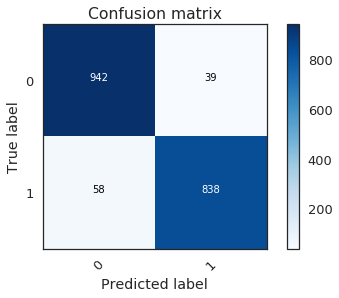

In [61]:
cnf_matrix = confusion_matrix(y_test, logistic_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'] , title='Confusion matrix')
plt.show()

In [62]:
FPR, TPR, Threshold = roc_curve(y_test, logistic_predict)
area_under_roc = auc(FPR, TPR)
print "Area under ROC Curve(AUC) is : %s" %area_under_roc

Area under ROC Curve(AUC) is : 0.94775625273


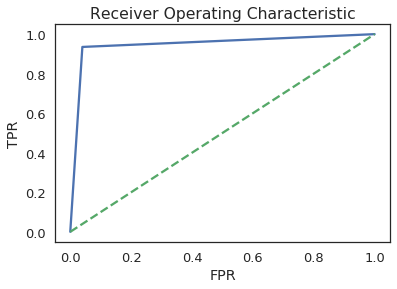

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(FPR,TPR)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##### Cross-Validation on Decision Tree classifier

In [65]:
depth=[]
for i in range(5,10):
    for j in range (1,4):
        decision_tree_gini_model = DecisionTreeClassifier(criterion = "gini", random_state = 42,max_depth=i, min_samples_leaf=j)
        scores = cross_val_score(decision_tree_gini_model, x_train, y_train, cv = 10, scoring='accuracy')
        depth.append((i,j,scores.mean()))
print depth

[(5, 1, 0.97872969567836809), (5, 2, 0.97872969567836809), (5, 3, 0.97872969567836809), (6, 1, 0.99895012761734903), (6, 2, 0.99895012761734903), (6, 3, 0.99895012761734903), (7, 1, 1.0), (7, 2, 1.0), (7, 3, 0.99947506561679789), (8, 1, 1.0), (8, 2, 1.0), (8, 3, 0.99947506561679789), (9, 1, 1.0), (9, 2, 1.0), (9, 3, 0.99947506561679789)]


    Maximum score of cross-validation is when i = 8 anf j = 3 
    i.e max_depth = 8 and min_samples_leaf = 3

In [66]:
decision_tree_gini_model = DecisionTreeClassifier(criterion = "gini", random_state = 42,max_depth=7, min_samples_leaf=1)
decision_tree_gini_model.fit(x_train, y_train)
decision_tree_gini_predict = decision_tree_gini_model.predict(x_test)
decision_tree_gini_accuracy = accuracy_score(decision_tree_gini_predict, y_test)
print decision_tree_gini_accuracy

1.0


In [67]:
print confusion_matrix(y_test, decision_tree_gini_predict)

[[981   0]
 [  0 896]]


[[981   0]
 [  0 896]]


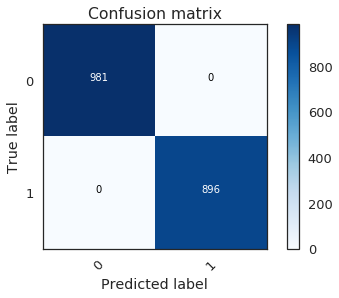

In [68]:
cnf_matrix = confusion_matrix(y_test, decision_tree_gini_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'] , title='Confusion matrix')
plt.show()

In [69]:
area_under_roc=roc_auc_score(y_test,decision_tree_gini_predict)
print "Area under ROC Curve(AUC) is : %s" %area_under_roc

Area under ROC Curve(AUC) is : 1.0


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier_model = RandomForestClassifier()
random_forest_classifier_model.fit(x_train, y_train)
random_forest_classifier_predict = random_forest_classifier_model.predict(x_test)
random_forest_classifier_accuracy = accuracy_score(random_forest_classifier_predict, y_test)
print random_forest_classifier_accuracy

1.0


In [71]:
random_forest_model_important_feature = random_forest_classifier_model.feature_importances_
print random_forest_model_important_feature

[ 0.    0.01  0.01  0.12  0.12  0.01  0.09  0.15  0.02  0.01  0.04  0.
  0.01  0.1   0.03  0.03  0.01  0.    0.01  0.04  0.1   0.06  0.02]


In [72]:
for name, importance in zip(train_db.columns.values , random_forest_classifier_model.feature_importances_):
    print(name, "=", importance)

('class', '=', 0.0022883262002395596)
('cap-shape', '=', 0.0061750369705143538)
('cap-surface', '=', 0.0064622250317200435)
('cap-color', '=', 0.12208500285949846)
('bruises', '=', 0.12390412626631067)
('odor', '=', 0.0051169711118965958)
('gill-attachment', '=', 0.094838137724316554)
('gill-spacing', '=', 0.15180204767806307)
('gill-size', '=', 0.02384042318591777)
('gill-color', '=', 0.010444829730878735)
('stalk-shape', '=', 0.036255144261089098)
('stalk-root', '=', 0.0020379573122774539)
('radius', '=', 0.010131875236524323)
('stalk-surface-above-ring', '=', 0.10096093226872464)
('stalk-surface-below-ring', '=', 0.027370889319682429)
('stalk-color-above-ring', '=', 0.028302362338266673)
('stalk-color-below-ring', '=', 0.0070125459209787189)
('veil-color', '=', 0.0006310663229516536)
('weight', '=', 0.010658559052949077)
('ring-number', '=', 0.038976858626623853)
('ring-type', '=', 0.10432692953282612)
('spore-print-color', '=', 0.064296349121510929)
('population', '=', 0.0220814039

### Feature importance plot 

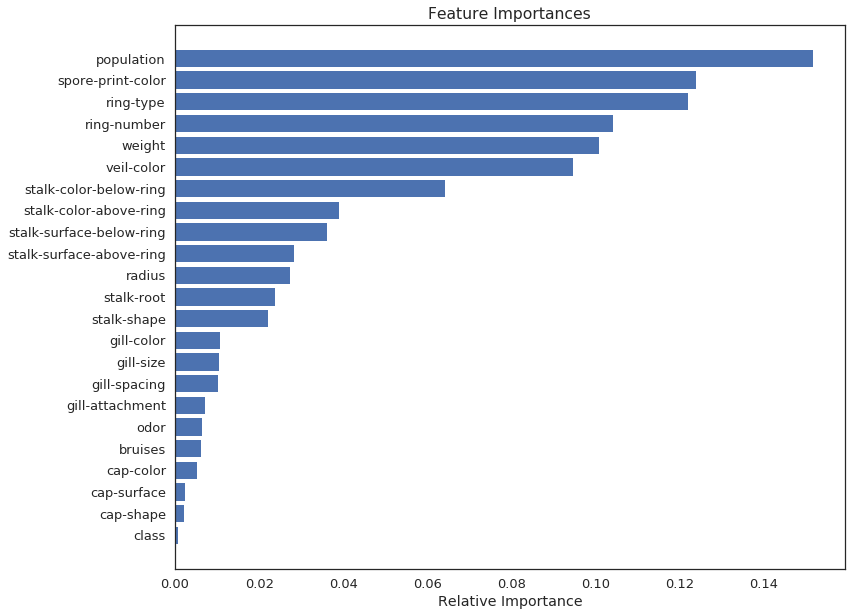

In [73]:
plt.figure(figsize=(12,10))
features = train_db.columns.values
importances = random_forest_classifier_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')
plt.show()

### AdaBoosting


In [74]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import AdaBoostRegressor
decision_tree_classifier = DecisionTreeClassifier()
AdaBoost_classfier_model = AdaBoostClassifier(base_estimator=decision_tree_classifier,learning_rate=1)
AdaBoost_classfier_model.fit(x_train,y_train)
AdaBoost_classfier_predict = AdaBoost_classfier_model.predict(x_test)
AdaBoost_classfier_accuracy = accuracy_score(AdaBoost_classfier_predict, y_test)
print AdaBoost_classfier_accuracy

1.0


In [75]:
print confusion_matrix(y_test, AdaBoost_classfier_predict)

[[981   0]
 [  0 896]]


[[981   0]
 [  0 896]]


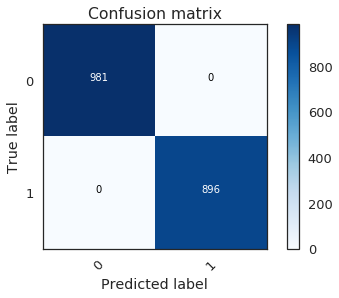

In [76]:
cnf_matrix = confusion_matrix(y_test, AdaBoost_classfier_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'] , title='Confusion matrix')
plt.show()

In [77]:
area_under_roc=roc_auc_score(y_test,AdaBoost_classfier_predict)
print "Area under ROC Curve(AUC) is : %s" %area_under_roc

Area under ROC Curve(AUC) is : 1.0


### Gradient Boosting 

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier_model = GradientBoostingClassifier()
gradient_boosting_classifier_model.fit(x_train, y_train)
gradient_boosting_classifier_predict = gradient_boosting_classifier_model.predict(x_test)
gradient_boosting_classifier_accuracy=accuracy_score(gradient_boosting_classifier_predict, y_test)
print gradient_boosting_classifier_accuracy

1.0


In [79]:
print confusion_matrix(y_test, gradient_boosting_classifier_predict)

[[981   0]
 [  0 896]]


[[981   0]
 [  0 896]]


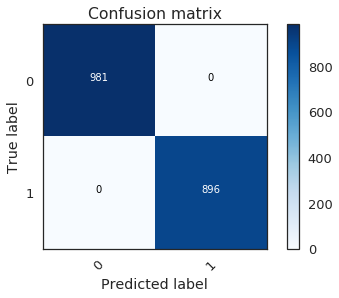

In [80]:
cnf_matrix = confusion_matrix(y_test, gradient_boosting_classifier_predict)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['0','1'] , title='Confusion matrix')
plt.show()

In [81]:
area_under_roc=roc_auc_score(y_test,gradient_boosting_classifier_predict)
print "Area under ROC Curve(AUC) is : %s" %area_under_roc

Area under ROC Curve(AUC) is : 1.0


In [82]:
models_accuracy = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Decision Tree','Random Forest','AdaBoost', 'GradeintBoost', ],
    'Score': [knn_accuracy, logistic_accuracy, decision_tree_gini_accuracy,random_forest_classifier_accuracy, AdaBoost_classfier_accuracy, gradient_boosting_classifier_accuracy]})
models_accuracy.sort_values(by='Score', ascending=True)

,Model,Score
0,KNN,0.835376
1,Logistic Regression,0.948322
2,Decision Tree,1.000000
3,Random Forest,1.000000
4,AdaBoost,1.000000
5,GradeintBoost,1.000000


#### Now using AdaBoosting predicting the test data set i.e. mushroom_test.csv

In [83]:
test_db.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,2,6,3,2,23,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,1,0,0,2,23,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,2,7,7,2,24,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,1,4,0,2,53,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,2,7,7,2,24,1,4,2,2,3


In [84]:
is_poisonous = AdaBoost_classfier_model.predict(test_db)

In [85]:
df = pd.DataFrame(is_poisonous)
df.columns=['class']
df.head()

,class
0,0
1,1
2,0
3,1
4,0


In [86]:
poisonous_in_test_data = sum(df['class'])
edible_in_test_data = len(df)-poisonous_in_test_data

In [87]:
map_df = {0:'e', 1:'p'}
df.replace({"class":map_df}, inplace=True)
df.head()

,class
0,e
1,p
2,e
3,p
4,e


In [88]:
result = pd.concat([df, test_db_orignal], axis=1)

In [89]:
result.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,g,t,n,f,c,b,u,...,s,p,g,w,23,o,p,k,y,d
1,p,x,y,g,f,f,f,c,b,g,...,k,b,b,w,23,o,l,h,v,d
2,e,b,s,w,t,a,f,c,b,w,...,s,w,w,w,24,o,p,k,s,m
3,p,f,y,y,f,f,f,c,b,p,...,k,n,b,w,53,o,l,h,y,d
4,e,b,y,y,t,a,f,c,b,w,...,s,w,w,w,24,o,p,k,n,m


In [90]:
result.to_csv('final_prediction.csv', index=False)

In [91]:
print "count of edible mushrooms in test data(based on our prediction) is : %d" %edible_in_test_data
print "count of poisonous mushrooms in test data(based on our prediction) is : %d" %poisonous_in_test_data



count of edible mushrooms in test data(based on our prediction) is : 1263
count of poisonous mushrooms in test data(based on our prediction) is : 1175


###### Here also the percentage of poisonous and edible is around 50-50